# 1

## 1.1 a

As $\varepsilon$ follows the normal distribution, the conditional distribution of y given x is:

$$
y \mid x \sim \mathcal{N} \left( \theta_0 + \theta_1 x + \dots + \theta_P x^P, \sigma^2 \right)
$$

The probability density function (PDF) for a normal distribution is:

$$
p(y \mid x, \theta, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y - \mu(x))^2}{2\sigma^2} \right)
$$

Where $\mu(x)$ is the predicted value:

$$
\mu(x) = \theta_0 + \theta_1 x + \dots + \theta_P x^P.
$$

Given N independent observations $\mathbf{y} = (y_1, y_2, \dots, y_N)^T$, the likelihood function is:

$$
L(\theta, \sigma^2) = \prod_{i=1}^{N} p(y_i \mid x_i, \theta, \sigma^2)
$$

Substituting the normal PDF:

$$
L(\theta, \sigma^2) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y_i - \mu(x_i))^2}{2\sigma^2} \right)
$$

Taking the natural logarithm:

$$
\log L(\theta, \sigma^2) = \sum_{i=1}^{N} \left[ -\frac{1}{2} \log (2\pi\sigma^2) - \frac{(y_i - \mu(x_i))^2}{2\sigma^2} \right]
$$

Simplifying:

$$
\log L(\theta, \sigma^2) = -\frac{N}{2} \log (2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (y_i - \mu(x_i))^2
$$

Where

$$
\mu(x_i) = \theta_0 + \theta_1 x_i + \dots + \theta_P x_i^P.
$$

## 1.1 b 

To find the maximum likelihood estimates, we differentiate the log-likelihood with respect to each parameter $\theta_j$ and set the derivative equal to zero:

$$
\frac{\partial}{\partial \theta_j}\log L(\theta, \sigma^2) = 0
$$

We have:

$$
\frac{\partial}{\partial \theta_j}\left[ -\frac{1}{2\sigma^2}\sum_{i=1}^{N}(y_i - \mu(x_i))^2 \right] = 0
$$

Carrying out this differentiation explicitly, we get:

$$
\frac{1}{\sigma^2}\sum_{i=1}^{N}(y_i - \mu(x_i)) x_i^j = 0
$$

Since  $\sigma^2$ is positive and nonzero, we simplify to:

$$
\sum_{i=1}^{N}(y_i - \mu(x_i)) x_i^j = 0 \quad \text{for each } j=0,1,...,P
$$

This results in the linear system of equations (normal equations):

$$
\sum_{i=1}^{N}\left(y_i - (\theta_0 + \theta_1 x_i + \dots + \theta_P x_i^P)\right)x_i^j = 0 \quad \text{for each } j=0,1,\dots,P.
$$

In matrix form, this solution can be expressed as:

$$
\hat{\theta} = (X^TX)^{-1}X^Ty
$$

where $X$ is the design matrix containing the polynomial terms.



## 1.1 c 

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


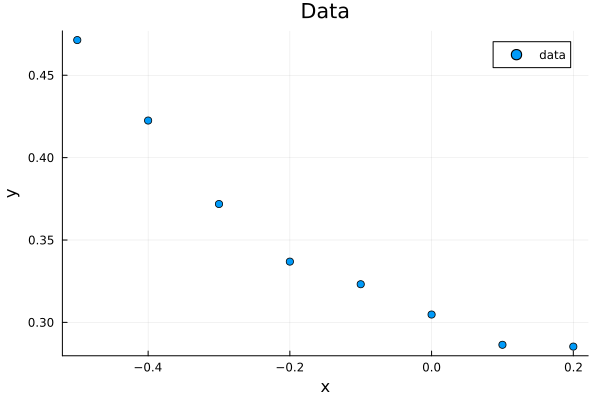

In [ ]:
import Pkg
Pkg.add("Plots")
using Plots

theta_0 = 0.3
theta_1 = -0.1
theta_2 = 0.5
variance = 0.0001
standard_deviation = sqrt(variance)

function get_y_for_noisy_x(start, step, stop, seed)
    x = start:step:stop
    Random.seed!(seed)
    epsilon = randn(length(x))
    y = theta_0 .+ theta_1*x .+ theta_2*x.^2 .+ standard_deviation*epsilon
    return x, y
end

x, y = get_y_for_noisy_x(-0.5, 0.1, 0.2, 42)

scatter(x, y, label="data", xlabel="x", ylabel="y", title="Data")

## 1.1 d

In [4]:
# Helper function: create design matrix for polynomial of order P
function design_matrix(xvals, P)
    # X will have columns [1, x, x^2, ..., x^P]
    X = [xi^p for xi in xvals, p in 0:P]
    return X
end

# Compute ML estimate \hat{theta} via normal equations and log-likelihood
function ml_estimate(xvals, yvals, P)
    X = design_matrix(xvals, P)
    # ML parameter estimate using least squares
    theta_hat = (X'X) \ (X'yvals)

    # Fitted values
    y_hat = X * theta_hat

    # Residual sum of squares (RSS)
    rss = sum((yvals .- y_hat).^2)

    # Estimate of sigma^2 is RSS / N in the ML setting
    sigma2_hat = rss / length(yvals)

    # Log-likelihood under Gaussian noise
    # L = -N/2 * log(2πσ_hat^2) - RSS/(2σ_hat^2)
    N = length(yvals)
    logL = -N/2 * log(2*π*sigma2_hat) - (rss / (2*sigma2_hat))

    return theta_hat, logL
end

# compute estimates and log-likelihoods for P=1, P=2, P=7
P_values = [1, 2, 7]
estimates = [ml_estimate(x, y, P) for P in P_values]

# print the estimates and log-likelihoods for each P value
for (P, (theta_hat, logL)) in zip(P_values, estimates)
    println("P = $P: \n theta_hat = $theta_hat, \n logL = $logL")
end

P = 1: 
 theta_hat = [0.3110337761775844, -0.2616609998063137], 
 logL = 20.370068473796504
P = 2: 
 theta_hat = [0.298970715645303, -0.14103039448349977, 0.4021020177427131], 
 logL = 31.906868731470446
P = 7: 
 theta_hat = [0.3047673837973398, -0.2368543981302316, -0.18489584123801242, 6.047347673249368, 22.011556484154045, -70.91447862607686, -335.8241180837112, -320.7380952988404], 
 logL = 210.7514444971666


The first three parameters of $\theta$ are closest to their true values when the number of parameters is the same as in the original function. The function with only 2 parameters is underfitting and the function with 7 parameters is overfitting.

The log-likelihood is increasing with the number of parameters. This is an indicator that, for noisy data, if the data is too likely to have been generated by the model, the model is likely overfitting.

## 1.1 e

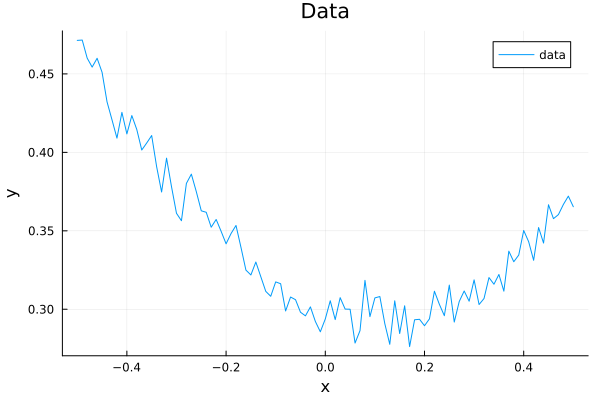

In [5]:
x_new, y_new = get_y_for_noisy_x(-0.5, 0.01, 0.5, 42)

plot(x_new, y_new, label="data", xlabel="x", ylabel="y", title="Data")

In [6]:
# calculate the log-likelihood for the new data under the ML parameter estimates obtained in (d) for P = 1,2 and 7
function log_likelihood_for_specific_params(xvals, yvals, theta_hat)
    P = length(theta_hat) - 1
    N = length(yvals)
    # estimates
    y_hat = design_matrix(xvals, P) * theta_hat

    # RSS
    rss = sum((yvals .- y_hat).^2)

    # sigma^2
    sigma2_hat = rss / N
    
    # log-likelihood
    logL = -N/2 * log(2*π*sigma2_hat) - (rss / (2*sigma2_hat))

    return logL
end

for (P, (theta_hat, logL)) in zip(P_values, estimates)
    println("P = $P: \n logL = $(log_likelihood_for_specific_params(x_new, y_new, theta_hat))")
end

P = 1: 
 logL = 129.71750005301888
P = 2: 
 logL = 264.3661760330159
P = 7: 
 logL = -191.69629114234226


Fitting the previous parameters to a wider range on the x-axis and a smaller step size one can observe the generelisability of the different models. The model with P=2 is not by far the most likely to have generated the data. P=7, which fit the noise quite well on a shorter scale is now a fairly bad model because outside the range of the previous data it deviates significantly from the original quadratic function. 

Plotting the graphs of the different fits and the newly generated data this can be seen fairly easily:

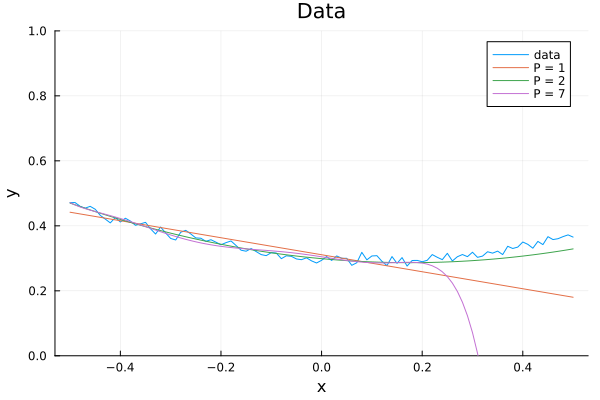

In [7]:
# plot the data and each of the fitted polynomials, keep the y-axis at 0 - 1
plot(x_new, y_new, label="data", xlabel="x", ylabel="y", title="Data", ylims=(0, 1))
for (P, (theta_hat, logL)) in zip(P_values, estimates)
    y_hat = design_matrix(x_new, P) * theta_hat
    plot!(x_new, y_hat, label="P = $P")
end
plot!()

# 2

## 1.2 a

By Bayes' theorem, the posterior distribution of the parameters is given by:

$$
p(\boldsymbol{\theta} | \mathbf{y}) = \frac{p(\mathbf{y} | \boldsymbol{\theta}) p(\boldsymbol{\theta})}{p(\mathbf{y})}
$$

Taking the logarithm:

$$
\log p(\boldsymbol{\theta} | \mathbf{y}) = \log p(\mathbf{y} | \boldsymbol{\theta}) + \log p(\boldsymbol{\theta}) - \log p(\mathbf{y})
$$

Since $p(\mathbf{y})$ is independent of $\boldsymbol{\theta}$, it can be ignored in optimization.

From **Exercise 1.1**, the likelihood function assuming **iid Gaussian noise** is:

$$
p(\mathbf{y} | \boldsymbol{\theta}) = \frac{1}{(2\pi\sigma^2)^{N/2}} \exp \left( -\frac{1}{2\sigma^2} \|\mathbf{y} - X\boldsymbol{\theta}\|^2 \right)
$$

Taking the logarithm:

$$
\log p(\mathbf{y} | \boldsymbol{\theta}) = -\frac{N}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \|\mathbf{y} - X\boldsymbol{\theta}\|^2
$$

The prior is given as a **Gaussian distribution**:

$$
p(\boldsymbol{\theta}) = \frac{1}{\sqrt{|2\pi\Sigma_0|}} \exp \left( -\frac{1}{2} (\boldsymbol{\theta} - \boldsymbol{\mu}_0)^T \Sigma_0^{-1} (\boldsymbol{\theta} - \boldsymbol{\mu}_0) \right)
$$


Since we assume **$\Sigma_0 = I$ and $\boldsymbol{\mu}_0 = 0$**, the prior simplifies to:

$$
p(\boldsymbol{\theta}) = \frac{1}{\sqrt{(2\pi)^P}} \exp \left( -\frac{1}{2} \|\boldsymbol{\theta}\|^2 \right)
$$

Taking the logarithm:

$$
\log p(\boldsymbol{\theta}) = -\frac{P}{2} \log(2\pi) - \frac{1}{2} \|\boldsymbol{\theta}\|^2
$$

Combining both terms:

$$
\log p(\boldsymbol{\theta} | \mathbf{y}) = -\frac{N}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \|\mathbf{y} - X\boldsymbol{\theta}\|^2 - \frac{P}{2} \log(2\pi) - \frac{1}{2} \|\boldsymbol{\theta}\|^2
$$

Ignoring constants that do not depend on $\boldsymbol{\theta}$, we obtain the **final expression for the log-posterior**:

$$
\log p(\boldsymbol{\theta} | \mathbf{y}) = -\frac{1}{2\sigma^2} \|\mathbf{y} - X\boldsymbol{\theta}\|^2 - \frac{1}{2} \|\boldsymbol{\theta}\|^2 + C
$$

where $C$ represents constants that do not affect optimization.

This **log-posterior function** is the objective function for **Maximum-A-Posteriori (MAP) estimation**, which balances **data fitting (likelihood)** and **regularization (prior)**.

## 1.2 b

In [14]:
Pkg.add("Optim")
Pkg.add("LinearAlgebra")
using Optim, LinearAlgebra

# Define the log-likeliohood function
function log_likelihood(theta, X, y, sigma_2)
    N = length(y)
    residual = y - X * theta
    return - (1 / (2 * sigma_2)) * sum(residual .^ 2)
end

# Define the log-prior function
function log_prior(theta)
    return - (1 / 2) * sum(theta .^ 2)
end

# Define the negative log-posterior (to minimize)
function neg_log_posterior(theta, X, y, sigma_2)
    return - (log_likelihood(theta, X, y, sigma_2) + log_prior(theta))
end

# Function to compute the MAP estimate
function compute_map_estimate(X, y, sigma_2)
    P = size(X, 2)
    theta_init = zeros(P)
    result = optimize(theta -> neg_log_posterior(theta, X, y, sigma_2), theta_init, LBFGS())
    return Optim.minimizer(result)
end

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


compute_map_estimate (generic function with 1 method)

## 1.2 c

In [18]:
using Random

# Define the true parameters and sigma^2
theta_true = [0.3, -0.1, 0.5]
sigma_2 = 0.001

# Generate the X and corresponding y values
X_values = -0.5:0.01:0.2
N = length(X_values)
X = hcat(ones(N), X_values, X_values .^ 2)

# Add Gaussian noise to the true model to generate y values
y = X * theta_true + sqrt(sigma_2) * randn(N)

# Apply the MAP estimator for different values of P
P_values = [1, 2, 7]

for P in P_values
    X_P = hcat(ones(N), [X_values .^ p for p in 1:P]...) # Design matrix for Pth-order model
    map_estimate = compute_map_estimate(X_P, y, sigma_2)
    println("P = $P: MAP estimate = $map_estimate")
end


P = 1: MAP estimate = [0.30915344202858974, -0.24819805910199655]
P = 2: MAP estimate = [0.30202469684993893, -0.13864384522229237, 0.3653019793097031]
P = 7: MAP estimate = [0.30320175493722523, -0.14113633447086465, 0.3003843034543661, -0.04053781400327425, 0.13189897675768603, -0.09468471890326935, 0.06362099460774179, -0.0346423739948772]


For $P=1$ and $P=2$, the MAP estimates will be slightly different from the true values because the regularization slightly penalizes large values of $\theta_1, \theta_2$ etc. However, because the model is not too complex, the MAP estimates should still be reasonably close to the true values. The regularization effect will have a more noticeable impact if we have a larger value of P.

For $P=7$, the MAP estimates should be closer to the true values compared to the ML estimates because the regularization imposed by the prior forces the parameters to remain more reasonable, rather than overfitting the noise in the data.

## 1.2 d

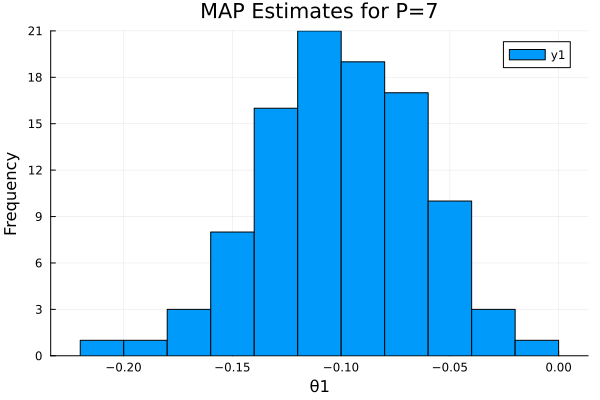

In [ ]:
using Plots

# Number of repetitions
reps = 100

map_estimates_P1 = Float64[]
map_estimates_P2 = Float64[]
map_estimates_P7 = Float64[]

for _ in 1:reps
    y = X * theta_true + sqrt(sigma_2) * randn(N)

    # Apply the MAP estimator for different values of P
    X_P1 = hcat(ones(N), X_values)
    X_P2 = hcat(ones(N), X_values, X_values .^ 2)
    X_P7 = hcat(ones(N), [X_values .^ p for p in 1:7]...)

    # MAP estimates for P = 1, P = 2, P = 7
    map_estimate_P1 = compute_map_estimate(X_P1, y, sigma_2)
    map_estimate_P2 = compute_map_estimate(X_P2, y, sigma_2)
    map_estimate_P7 = compute_map_estimate(X_P7, y, sigma_2)

    # Store the estimates
    push!(map_estimates_P1, map_estimate_P1[2])
    push!(map_estimates_P2, map_estimate_P2[2])
    push!(map_estimates_P7, map_estimate_P7[2])
end

# Plot the histograms of the MAP estimates for each value of P
histogram(map_estimates_P1, title="MAP Estimates for P=1", xlabel="θ1", ylabel="Frequency")
# histogram(map_estimates_P2, title="MAP Estimates for P=2", xlabel="θ1", ylabel="Frequency")
# histogram(map_estimates_P7, title="MAP Estimates for P=7", xlabel="θ1", ylabel="Frequency")

# 3